In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('life expectancy.csv')
import pandas as pd

# List of columns with potential missing values
columns_with_missing_values = [
    'Life Expectancy World Bank', 'Prevelance of Undernourishment', 'CO2',
    'Health Expenditure %', 'Education Expenditure %', 'Unemployment',
    'Corruption', 'Sanitation', 'Injuries', 'Communicable', 'NonCommunicable'
]

# Calculate the sum of missing values for each column
missing_values_sum = df[columns_with_missing_values].isna().sum()

# Display the sum of missing values for each column
print(missing_values_sum)


Life Expectancy World Bank         188
Prevelance of Undernourishment     684
CO2                                152
Health Expenditure %               180
Education Expenditure %           1090
Unemployment                       304
Corruption                        2331
Sanitation                        1247
Injuries                             0
Communicable                         0
NonCommunicable                      0
dtype: int64


In [ ]:
import pandas as pd

# Drop columns with more than 50% missing values (e.g., Corruption)
df = df.drop(columns=['Corruption'])

# Fill missing values for each column
df['Life Expectancy World Bank'].fillna(df['Life Expectancy World Bank'].mean(), inplace=True)
df['Prevelance of Undernourishment'].fillna(df['Prevelance of Undernourishment'].median(), inplace=True)
df['CO2'].fillna(df['CO2'].mean(), inplace=True)
df['Health Expenditure %'].fillna(df['Health Expenditure %'].mean(), inplace=True)
df['Education Expenditure %'].fillna(df['Education Expenditure %'].median(), inplace=True)
df['Unemployment'].fillna(df['Unemployment'].median(), inplace=True)
df['Sanitation'].fillna(df['Sanitation'].median(), inplace=True)

# Since 'Injuries', 'Communicable', and 'NonCommunicable' have no missing values, we don't need to fill them.

# Optional: Normalize or Standardize the numerical columns if needed
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
columns_to_scale = ['Life Expectancy World Bank', 'CO2', 'Health Expenditure %',
                    'Education Expenditure %', 'Unemployment', 'Sanitation']
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Now the data is ready for visualization
print(df.head())


           Country Name Country Code                      Region  \
0           Afghanistan          AFG                  South Asia   
1                Angola          AGO          Sub-Saharan Africa   
2               Albania          ALB       Europe & Central Asia   
3               Andorra          AND       Europe & Central Asia   
4  United Arab Emirates          ARE  Middle East & North Africa   

           IncomeGroup  Year  Life Expectancy World Bank  \
0           Low income  2001                   -1.471260   
1  Lower middle income  2001                   -2.483710   
2  Upper middle income  2001                    0.496935   
3          High income  2001                    0.000000   
4          High income  2001                    0.524959   

   Prevelance of Undernourishment       CO2  Health Expenditure %  \
0                            47.8 -0.207756              0.000000   
1                            67.5 -0.187572             -0.680388   
2                      

region Counts (sorted in descending order):
Region
Europe & Central Asia         893
Sub-Saharan Africa            836
Latin America & Caribbean     551
East Asia & Pacific           513
Middle East & North Africa    304
South Asia                    152
North America                  57
Name: count, dtype: int64


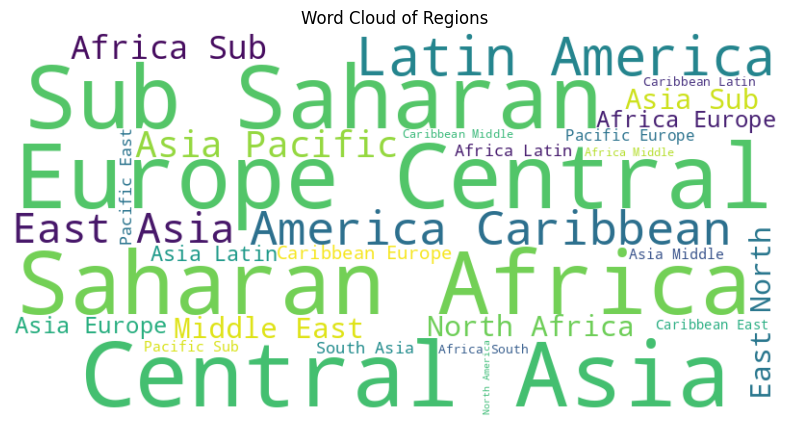

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Calculate the frequency of each occupation
region_counts = df['Region'].value_counts()

# Print the frequencies sorted in descending order
print("region Counts (sorted in descending order):")
print(region_counts)
# Generate a word cloud for the 'Region' column
text = " ".join(region for region in df['Region'])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Regions")
plt.show()


# Analysis For Word Chart
Dominant Regions: Central Asia, Europe Central, Sub-Saharan Africa,Latin America & Caribbean,etc are the most common regions, each with a significant number of occurrences.

Sparse Regions: Regions like Middle East & North Africa, South Asia,
North America are significantly less frequent, indicating lower representation in the dataset.

                     count      mean       std       min       25%       50%  \
IncomeGroup                                                                    
High income          988.0  0.910765  0.356339 -0.323079  0.668460  0.967057   
Low income           437.0 -1.411177  0.597855 -3.123256 -1.847243 -1.402345   
Lower middle income  855.0 -0.490890  0.845854 -2.894800 -0.960902 -0.324171   
Upper middle income  838.0  0.162958  0.606365 -2.074742 -0.015985  0.323722   

                          75%       max  
IncomeGroup                              
High income          1.196850  1.552943  
Low income          -0.954683 -0.077005  
Lower middle income  0.116489  0.976080  
Upper middle income  0.539650  1.119489  


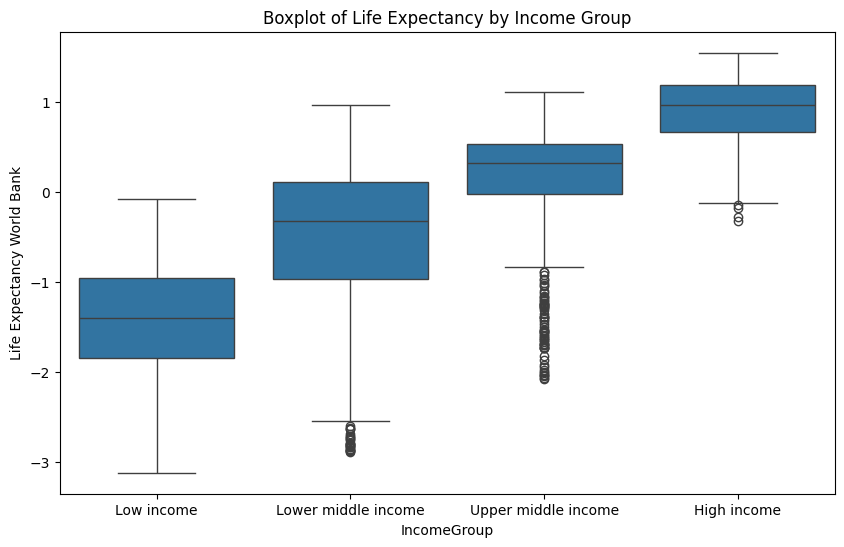

In [ ]:
import seaborn as sns
lifeexpectancy = df.groupby('IncomeGroup')['Life Expectancy World Bank'].describe()

# Print the aggregated data
print(lifeexpectancy)
# Boxplot for Life Expectancy by Income Group
plt.figure(figsize=(10, 6))
sns.boxplot(x='IncomeGroup', y='Life Expectancy World Bank', data=df)
plt.title('Boxplot of Life Expectancy by Income Group')
plt.show()


# Analysis on Income Group vs Life Expectancy
Performance Trends: Higher income groups tend to have better metrics (e.g., higher health expenditure, better life expectancy) and less variability in normalized values. In contrast, lower income groups show poorer metrics and greater variability.

Data Spread: There is a noticeable spread in metrics, with high-income countries generally performing better and having less variation compared to lower income countries.

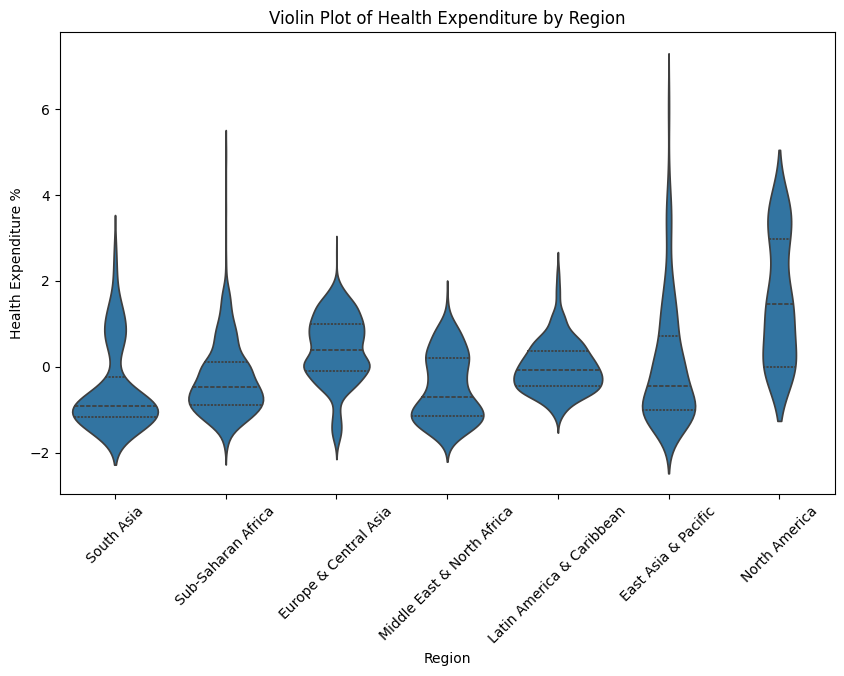

                            count      mean       std       min       25%  \
Region                                                                      
East Asia & Pacific         513.0  0.062866  1.461653 -1.644487 -1.000165   
Europe & Central Asia       893.0  0.393654  0.778568 -1.750749 -0.100481   
Latin America & Caribbean   551.0  0.000263  0.596535 -1.197206 -0.448012   
Middle East & North Africa  304.0 -0.496404  0.765543 -1.723670 -1.151120   
North America                57.0  1.554812  1.416139  0.000000  0.000000   
South Asia                  152.0 -0.516496  0.990909 -1.555869 -1.178342   
Sub-Saharan Africa          836.0 -0.290835  0.828535 -1.845375 -0.882263   

                                 50%       75%       max  
Region                                                    
East Asia & Pacific        -0.458227  0.710940  6.464216  
Europe & Central Asia       0.385725  0.999344  2.645716  
Latin America & Caribbean  -0.084761  0.361532  2.333620  
Middle East

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Region', y='Health Expenditure %', data=df, inner="quartile")
plt.title('Violin Plot of Health Expenditure by Region')
plt.xticks(rotation=45)
plt.show()

# Print data
print(df.groupby('Region')['Health Expenditure %'].describe())


# Analysis on Health Expenditure according to Regions
North America has the highest average health expenditure, indicating better funding compared to other regions.

Europe & Central Asia also shows higher average expenditure but with moderate variability.

East Asia & Pacific and Latin America & Caribbean have near-zero averages, suggesting more balanced or lower expenditures.

South Asia and Middle East & North Africa have negative averages, indicating relatively lower health expenditure.

Sub-Saharan Africa shows a broad range of values with some high outliers, reflecting significant variability in health expenditure across countries in this region.

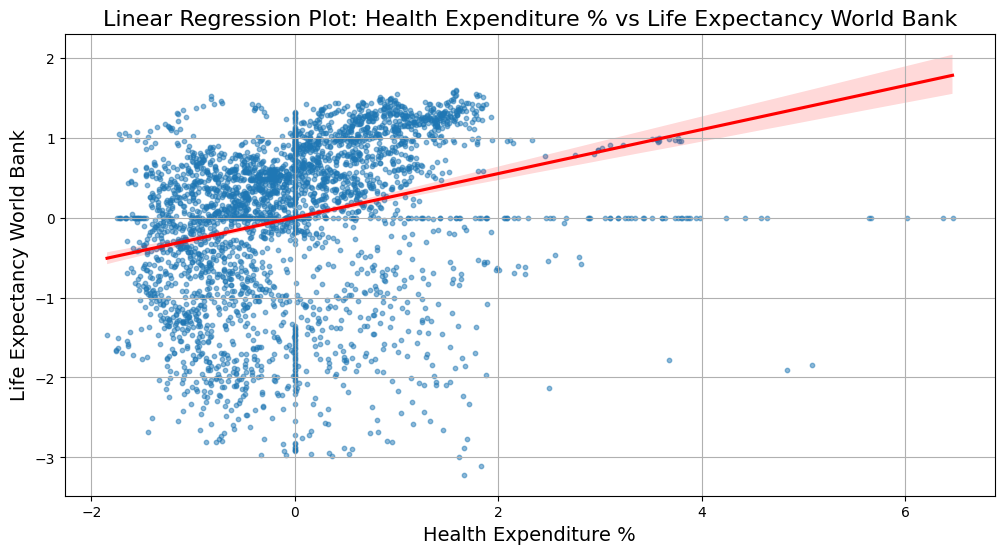

       Health Expenditure %  Life Expectancy World Bank
count          3.306000e+03                3.306000e+03
mean          -9.026859e-17               -5.845966e-16
std            1.000151e+00                1.000151e+00
min           -1.845375e+00               -3.216036e+00
25%           -7.450745e-01               -6.057141e-01
50%           -7.875313e-02                1.942075e-01
75%            5.924535e-01                7.362503e-01
max            6.464216e+00                1.599075e+00


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the linear regression plot for Health Expenditure % vs Life Expectancy World Bank
plt.figure(figsize=(12, 6))
sns.regplot(x='Health Expenditure %', y='Life Expectancy World Bank', data=df, scatter_kws={'s':10, 'alpha':0.5}, line_kws={'color':'red'})
plt.title('Linear Regression Plot: Health Expenditure % vs Life Expectancy World Bank', fontsize=16)
plt.xlabel('Health Expenditure %', fontsize=14)
plt.ylabel('Life Expectancy World Bank', fontsize=14)
plt.grid(True)
plt.show()

# Print summary statistics for the variables
print(df[['Health Expenditure %', 'Life Expectancy World Bank']].describe())


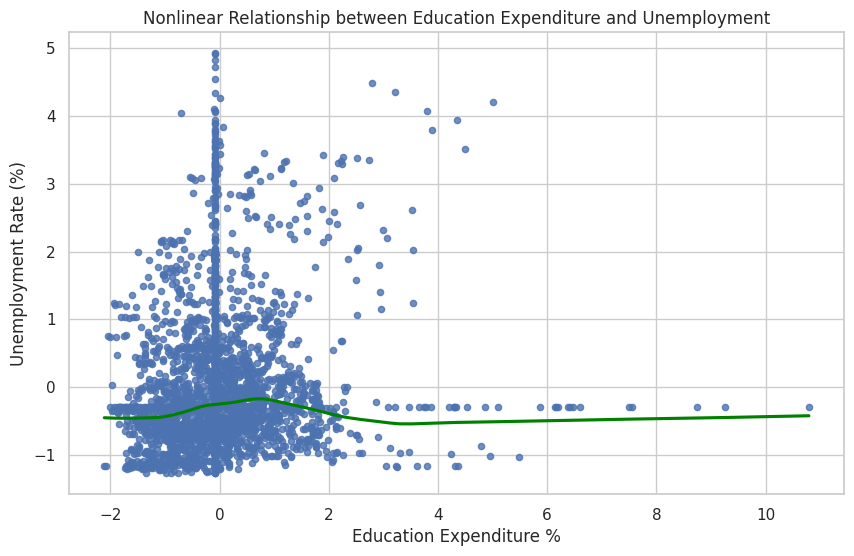

       Education Expenditure %  Unemployment
count             3.306000e+03  3.306000e+03
mean             -1.332536e-16  6.017906e-17
std               1.000151e+00  1.000151e+00
min              -2.110345e+00 -1.267908e+00
25%              -4.711737e-01 -6.337076e-01
50%              -8.392104e-02 -2.981749e-01
75%               2.332492e-01  2.984528e-01
max               1.079221e+01  4.922057e+00


In [ ]:
sns.set(style="whitegrid")

# # Example 1: Life Expectancy vs. CO2 with LOESS smoothing
# plt.figure(figsize=(10, 6))
# sns.regplot(x='Life Expectancy World Bank', y='CO2', data=df, lowess=True, scatter_kws={'s': 20}, line_kws={'color': 'red'})
# plt.title('Nonlinear Relationship between CO2 and Life Expectancy')
# plt.xlabel('CO2 Emissions (Metric Tons per Capita)')
# plt.ylabel('Life Expectancy (Years)')
# plt.show()

# Example 2: Education Expenditure vs. Unemployment with LOESS smoothing
plt.figure(figsize=(10, 6))
sns.regplot(x='Education Expenditure %', y='Unemployment', data=df, lowess=True, scatter_kws={'s': 20}, line_kws={'color': 'green'})
plt.title('Nonlinear Relationship between Education Expenditure and Unemployment')
plt.xlabel('Education Expenditure %')
plt.ylabel('Unemployment Rate (%)')
plt.show()

print(df[['Education Expenditure %', 'Unemployment']].describe())

# Analysis on Education Expenditure and Unemployment
The graph shows a complex relationship between education spending and unemployment. Initially, increasing education spending seems to decrease unemployment. However, as spending continues to rise, the relationship becomes less clear, suggesting that further increases may not significantly reduce unemployment. There are also some exceptions to this pattern, which might be due to factors specific to certain regions or countries.

In [ ]:
import plotly.express as px

# 3D Scatter plot for Life Expectancy, Health Expenditure, and CO2
fig = px.scatter_3d(df, x='Life Expectancy World Bank', y='Health Expenditure %', z='CO2',
                    color='Region', size='Health Expenditure %', hover_name='Country Name')
fig.update_layout(title='3D Scatter Plot of Life Expectancy, Health Expenditure, and CO2')
fig.show()


<ipython-input-47-830c70a340df>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




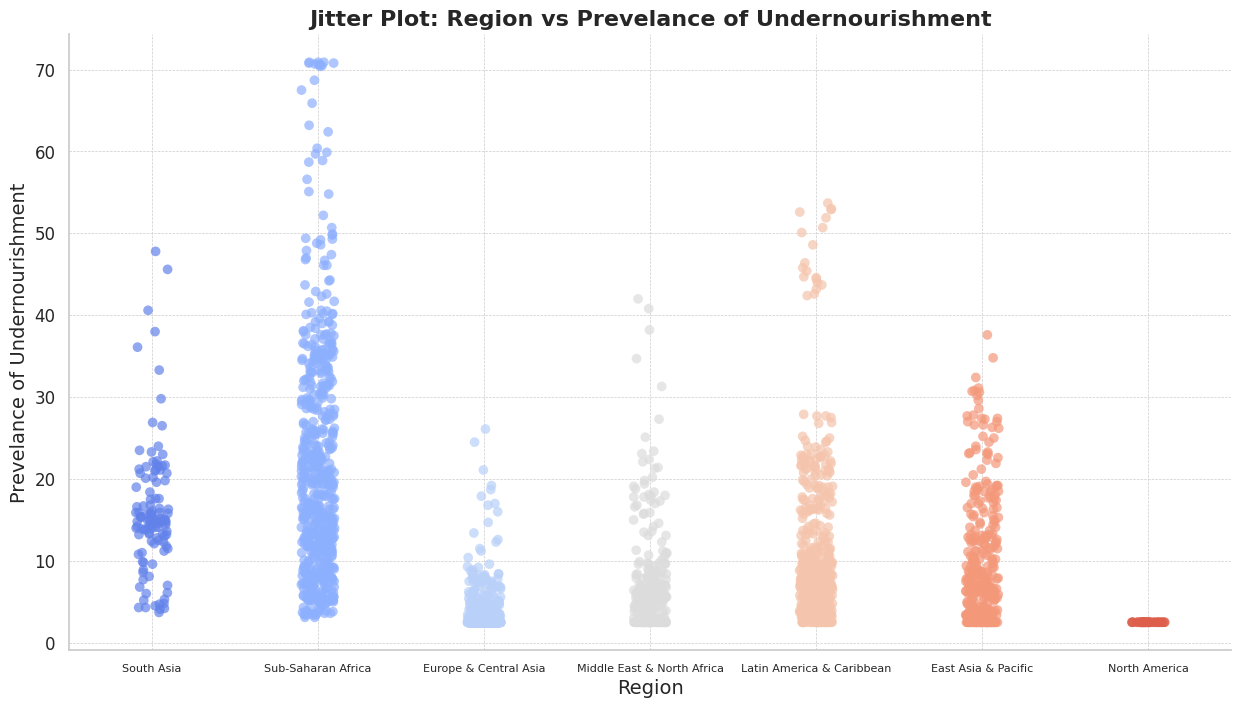

In [ ]:
# Assuming df is your DataFrame
plt.figure(figsize=(15, 8))

# Create a jitter plot with customized style
sns.set(style="whitegrid")
ax = sns.stripplot(x='Region', y='Prevelance of Undernourishment', data=df,
                   jitter=True, size=7, palette='coolwarm', alpha=0.7)

# Add titles and labels
plt.title('Jitter Plot: Region vs Prevelance of Undernourishment', fontsize=16, weight='bold')
plt.xlabel('Region', fontsize=14)
plt.ylabel('Prevelance of Undernourishment', fontsize=14)

# Customize the axes for better readability
plt.xticks(fontsize=8)
plt.yticks(fontsize=12)
plt.grid(True, which='major', linestyle='--', linewidth=0.5)

# Remove the top and right spines
sns.despine()

# Show the plot
plt.show()

#Analysis:
 The jitter plot clearly shows that undernourishment is not evenly distributed across regions. South Asia and Sub-Saharan Africa have the highest concentrations of countries with high rates of undernourishment, while regions like Europe & Central Asia, Middle East & North Africa, and Latin America & Caribbean have a more varied distribution. Factors such as economic development, political instability, climate change, and inequality likely play significant roles in these disparities.

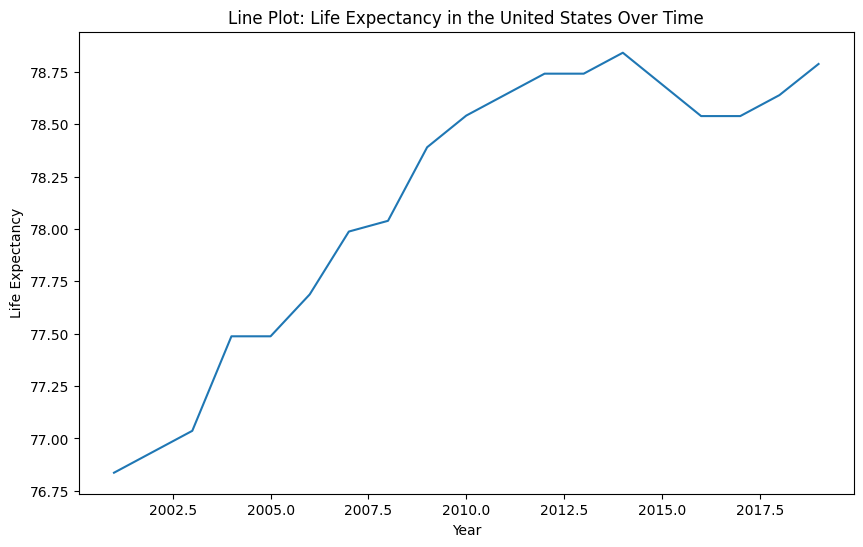

In [ ]:
# Line plot for Life Expectancy over the years for a specific country
plt.figure(figsize=(10, 6))
country_data = df[df['Country Name'] == 'United States']
plt.plot(country_data['Year'], country_data['Life Expectancy World Bank'])
plt.title('Line Plot: Life Expectancy in the United States Over Time')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.show()


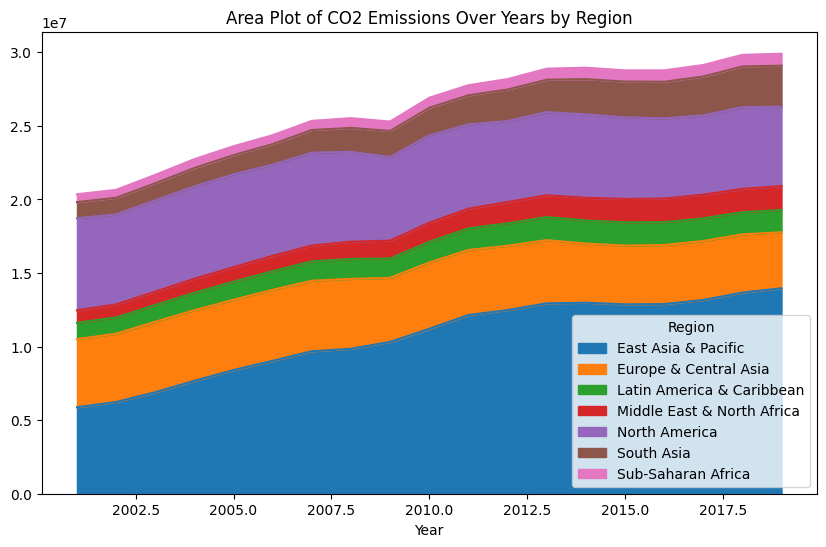

In [ ]:
# Area plot for CO2 emissions over Years by Region
df_pivot = df.pivot_table(index='Year', columns='Region', values='CO2', aggfunc='sum')
df_pivot.plot(kind='area', figsize=(10, 6), stacked=True)
plt.title('Area Plot of CO2 Emissions Over Years by Region')
plt.show()


In [ ]:
import plotly.graph_objects as go

# Sample data (replace with your data)
data = country_data[['Year', 'CO2']].dropna()
data['Change'] = data['CO2'].diff().fillna(0)
values = list(data['Change'])
labels = list(data['Year'])

# Create waterfall chart
fig = go.Figure(go.Waterfall(
    x=labels,
    y=values,
    connector=dict(line=dict(color="gray", width=1))
))

fig.update_layout(
    title="Waterfall Chart of CO2 Emissions Changes",
    xaxis_title="Year",
    yaxis_title="Change in CO2 Emissions"
)

fig.show()


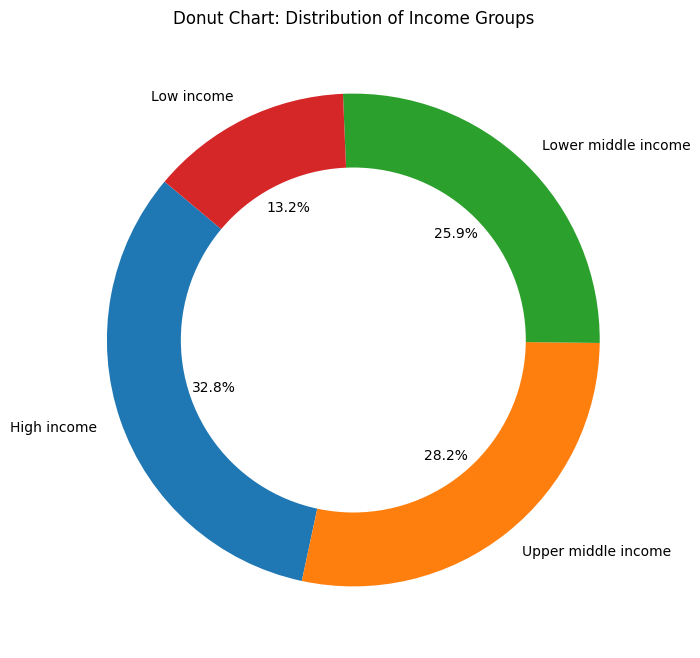

In [ ]:
# Donut chart for the distribution of income groups
income_group_counts = df['IncomeGroup'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(income_group_counts, labels=income_group_counts.index, autopct='%1.1f%%', startangle=140)
plt.gca().add_artist(plt.Circle((0, 0), 0.70, fc='white'))
plt.title('Donut Chart: Distribution of Income Groups')
plt.show()


In [ ]:
import plotly.express as px

# Treemap for Regions and Countries
fig = px.treemap(df, path=['Region', 'Country Name'], values='Life Expectancy World Bank',
                 color='Region', hover_data=['IncomeGroup'], title='Treemap of Life Expectancy by Region and Country')
fig.show()


In [ ]:
# Funnel chart for demonstrating progression of a metric, e.g., number of countries by income group
income_group_counts = df['IncomeGroup'].value_counts().reset_index()
income_group_counts.columns = ['IncomeGroup', 'Count']

fig = px.funnel(income_group_counts, x='IncomeGroup', y='Count', title='Funnel Chart of Countries by Income Group')
fig.show()
